In [ ]:
# Cuarto paso. Después de la segmentación de los modelos, Feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/modelos_segmentados.csv")

In [3]:
df

,make,fuel,year,kms,power,shift,price,segmento
0,Opel,Gasolina,2022,24847.0,110.0,manual,19990,B
1,Opel,Diésel,2021,41356.0,120.0,automatic,18590,B
2,Opel,Gasolina,2021,51390.0,110.0,manual,18200,B
3,Opel,Gasolina,2021,30536.0,110.0,manual,17100,B
4,Opel,Gasolina,2019,40816.0,83.0,manual,13490,B
...,...,...,...,...,...,...,...,...
11180,Citroen,Gasolina,2012,103700.0,120.0,manual,8500,C
11181,Citroen,Diésel,2017,71330.0,120.0,manual,18200,C
11182,Citroen,Diésel,2014,109350.0,150.0,manual,11690,C
11183,Citroen,Gasolina,2017,108697.0,130.0,manual,13199,C


In [4]:
def column_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns=[column_name])
    return df

In [5]:
df_feat = df

In [6]:
df_feat = column_dummies(df_feat,"make")
df_feat = column_dummies(df_feat,"fuel")
df_feat = column_dummies(df_feat,"shift")
df_feat = column_dummies(df_feat,"segmento")

In [7]:
df_feat

,year,kms,power,price,make_Abarth,make_Alfa Romeo,make_Alpine,make_Aston Martin,make_Audi,make_BMW,...,segmento_A,segmento_B,segmento_C,segmento_D,segmento_E,segmento_F,segmento_J,segmento_M,segmento_S,segmento_otros
0,2022,24847.0,110.0,19990,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2021,41356.0,120.0,18590,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2021,51390.0,110.0,18200,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2021,30536.0,110.0,17100,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2019,40816.0,83.0,13490,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11180,2012,103700.0,120.0,8500,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11181,2017,71330.0,120.0,18200,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11182,2014,109350.0,150.0,11690,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11183,2017,108697.0,130.0,13199,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [8]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11185 entries, 0 to 11184
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 11185 non-null  int64  
 1   kms                  11185 non-null  float64
 2   power                11185 non-null  float64
 3   price                11185 non-null  int64  
 4   make_Abarth          11185 non-null  bool   
 5   make_Alfa Romeo      11185 non-null  bool   
 6   make_Alpine          11185 non-null  bool   
 7   make_Aston Martin    11185 non-null  bool   
 8   make_Audi            11185 non-null  bool   
 9   make_BMW             11185 non-null  bool   
 10  make_Bentley         11185 non-null  bool   
 11  make_CUPRA           11185 non-null  bool   
 12  make_Cadillac        11185 non-null  bool   
 13  make_Chevrolet       11185 non-null  bool   
 14  make_Chrysler        11185 non-null  bool   
 15  make_Citroen         11185 non-null 

In [9]:
# Transformación logarítmica

# Copia el DataFrame original
df_feat_log = df_feat.copy()

# Aplica la transformación logarítmica
cols_to_transform = ['price', 'power', 'kms', 'year']
df_feat_log[cols_to_transform] = df_feat_log[cols_to_transform].apply(np.log1p)

In [10]:
df_feat_log

,year,kms,power,price,make_Abarth,make_Alfa Romeo,make_Alpine,make_Aston Martin,make_Audi,make_BMW,...,segmento_A,segmento_B,segmento_C,segmento_D,segmento_E,segmento_F,segmento_J,segmento_M,segmento_S,segmento_otros
0,7.612337,10.120533,4.709530,9.903037,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,7.611842,10.629997,4.795791,9.830433,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,7.611842,10.847218,4.709530,9.809232,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,7.611842,10.326694,4.709530,9.746892,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,7.610853,10.616854,4.430817,9.509778,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11180,7.607381,11.549267,4.795791,9.047939,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11181,7.609862,11.175086,4.795791,9.809232,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11182,7.608374,11.602318,5.017280,9.366575,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
11183,7.609862,11.596329,4.875197,9.487972,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


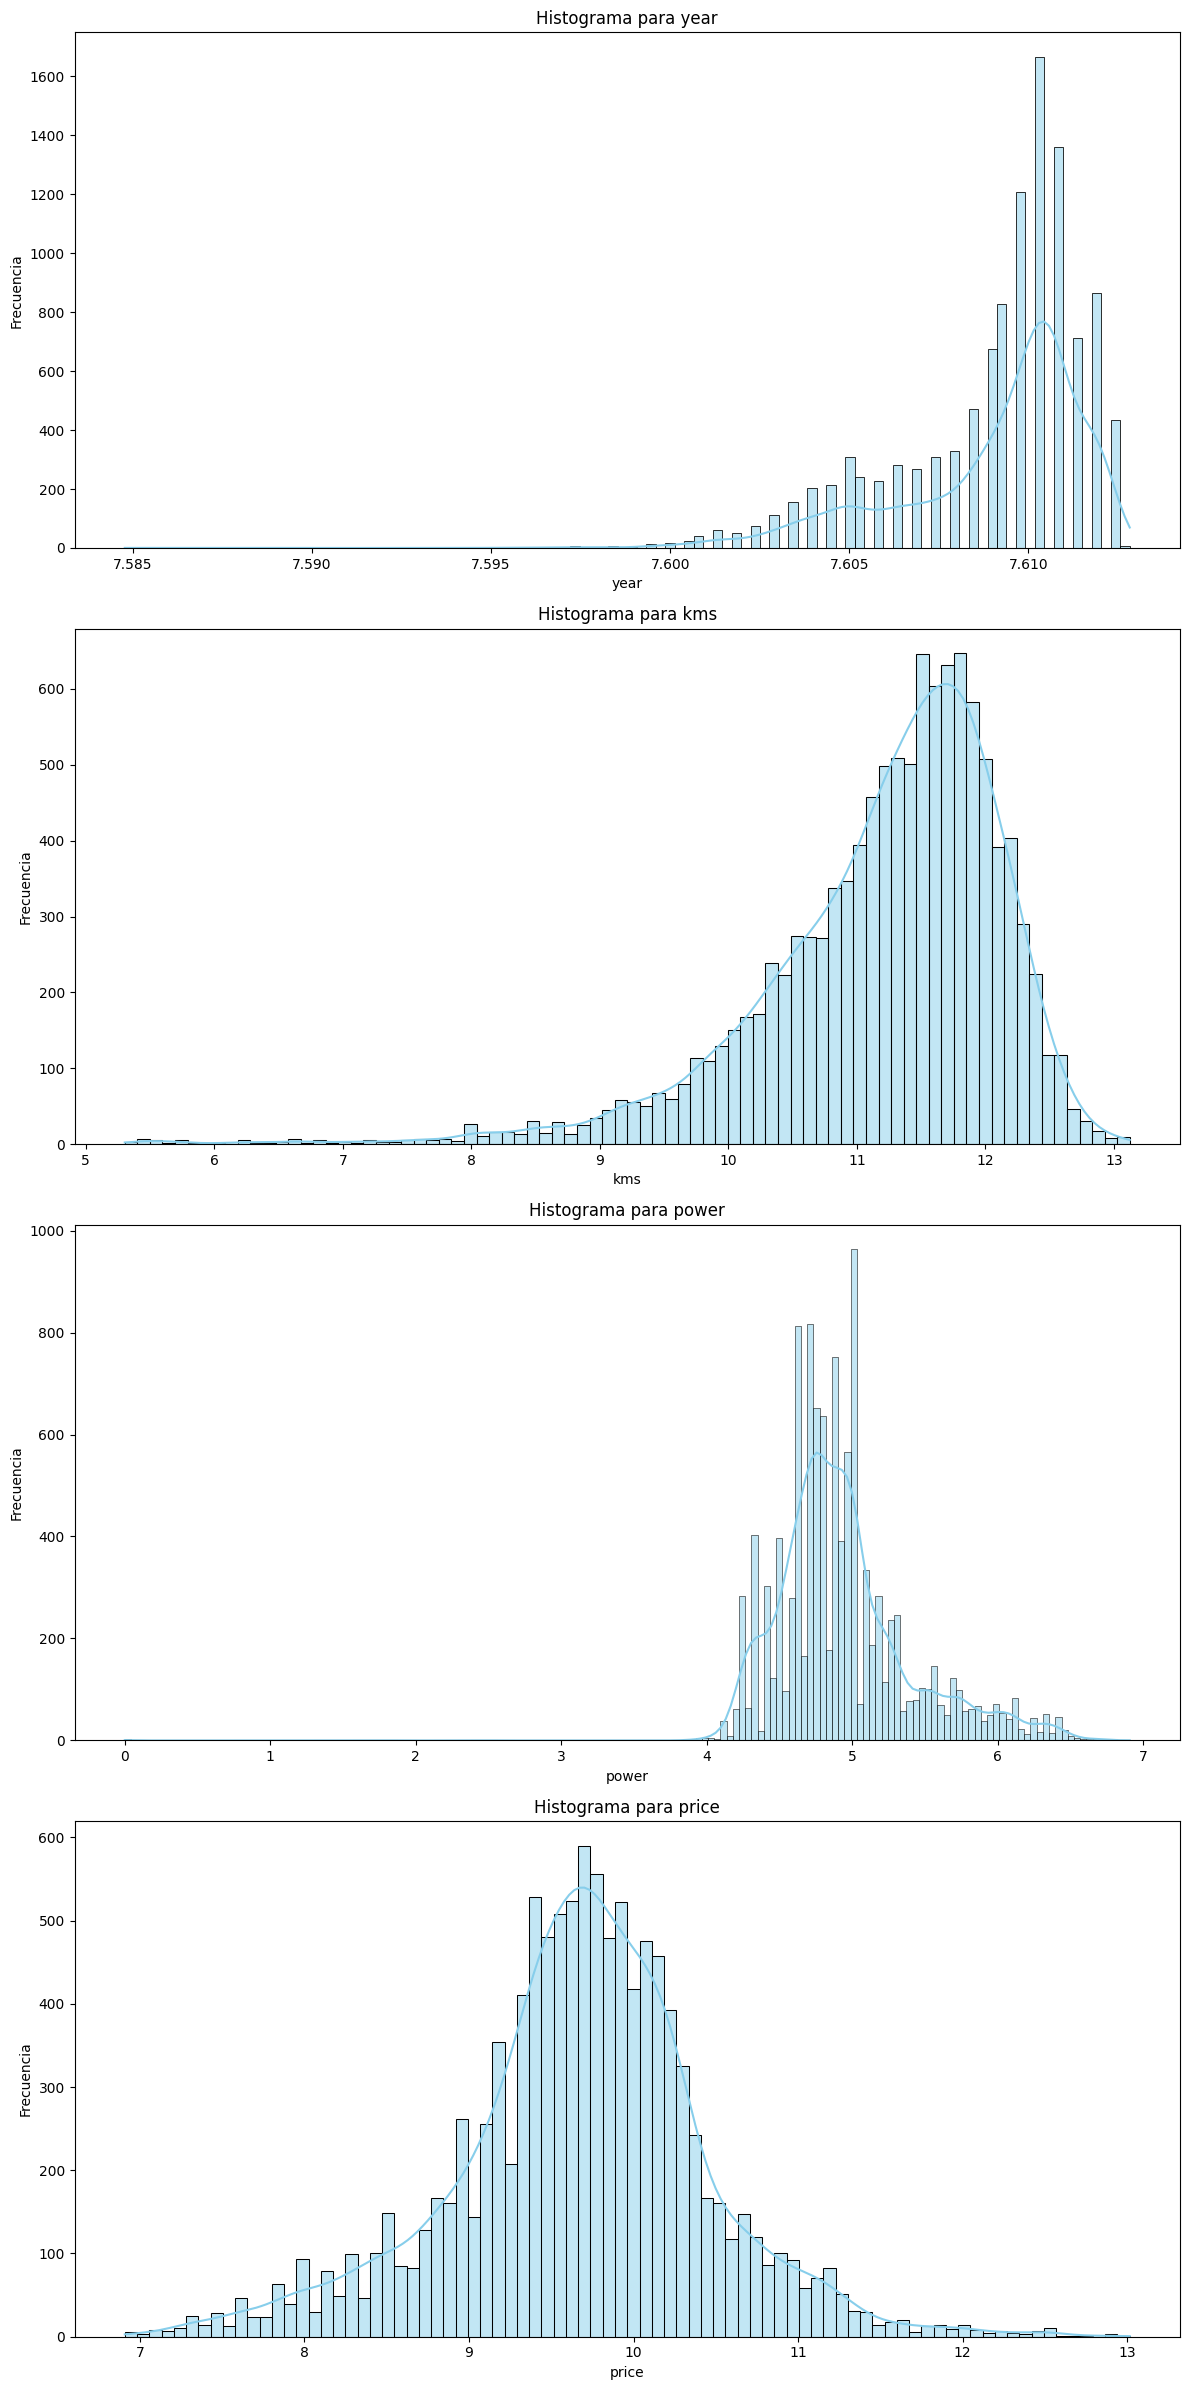

In [11]:
# Crear histogramas para columnas numéricas despues de la transformación logarítmica

columnas_numericas = ['year', 'kms', 'power', 'price']

# Configurar la figura de matplotlib: 1 gráfico por fila, más alto
plt.figure(figsize=(12, 6 * len(columnas_numericas)))  # ancho 12, alto dinámico

# Crear histogramas para cada columna numérica
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(len(columnas_numericas), 1, i)  # una fila por gráfica
    sns.histplot(df_feat_log[col], kde=True, color="skyblue")
    plt.title(f'Histograma para {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar el diseño
plt.show()

In [12]:

# 80% para desarrollo (X_train, X_test, GridSearch, etc.)
# 20% para validación final
df_dev, df_final = train_test_split(df_feat, test_size=0.2, random_state=42)

In [13]:
df_dev

,year,kms,power,price,make_Abarth,make_Alfa Romeo,make_Alpine,make_Aston Martin,make_Audi,make_BMW,...,segmento_A,segmento_B,segmento_C,segmento_D,segmento_E,segmento_F,segmento_J,segmento_M,segmento_S,segmento_otros
476,2017,93000.0,110.0,14900,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10536,2019,151716.0,131.0,20900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8376,2018,84490.0,85.0,10700,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6395,2018,172844.0,286.0,58200,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
11092,2015,69000.0,130.0,13799,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2013,137186.0,211.0,45000,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5191,2014,137000.0,258.0,32890,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
5390,2016,29445.0,90.0,19990,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
860,2003,111980.0,395.0,14990,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [14]:
df_final

,year,kms,power,price,make_Abarth,make_Alfa Romeo,make_Alpine,make_Aston Martin,make_Audi,make_BMW,...,segmento_A,segmento_B,segmento_C,segmento_D,segmento_E,segmento_F,segmento_J,segmento_M,segmento_S,segmento_otros
8779,2016,155938.0,120.0,11100,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7393,2007,202000.0,143.0,5900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7644,2018,73500.0,190.0,27900,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5106,2010,185000.0,177.0,9999,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3013,2013,138399.0,110.0,9990,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2020,105102.0,150.0,25990,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6829,2022,4797.0,141.0,26900,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
56,2016,135779.0,135.0,12199,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4829,2005,194600.0,98.0,2900,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [15]:
df_dev.describe()

,year,kms,power,price
count,8948.000000,8948.000000,8948.000000,8948.000000
mean,2015.327783,100317.563590,157.022910,21875.137908
std,5.423679,69519.475679,97.331735,24024.610053
min,1967.000000,200.000000,0.000000,1000.000000
25%,2013.000000,46437.750000,102.000000,10886.250000
50%,2017.000000,89000.000000,130.000000,16490.000000
75%,2019.000000,140000.000000,165.000000,24990.000000
max,2023.000000,500000.000000,999.000000,449000.000000


In [16]:
df_final.describe()

,year,kms,power,price
count,2237.000000,2237.000000,2237.000000,2237.000000
mean,2015.248547,100851.754582,156.277157,21164.386679
std,5.255622,68198.494624,98.637185,23245.328601
min,1992.000000,200.000000,11.000000,1000.000000
25%,2013.000000,47270.000000,102.000000,10699.000000
50%,2017.000000,89000.000000,130.000000,15990.000000
75%,2019.000000,140630.000000,165.000000,24000.000000
max,2023.000000,475000.000000,816.000000,389900.000000


In [17]:
df_feat.to_csv('../data/feature_engineering_todo.csv', index=False)

In [18]:
df_dev.to_csv('../data/feature_engineering.csv', index=False)

In [19]:
df_final.to_csv('../data/feature_engineering_final.csv', index=False)

In [20]:
# df_feat_log.to_csv('../data/feature_engineering_log.csv', index=False)